In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


import matplotlib as plt
from matplotlib import pyplot as pllt
import seaborn as sns

In [2]:
Cars = pd.read_csv("data/Cars_clean.csv")
Cars

,Brand,Model,Year,EngineSize,Mileage,Transmission,FuelType,Price
0,Audi,A1,2017.0,1.4,15735.0,Manual,Petrol,12500.0
1,Audi,A6,2016.0,2.0,36203.0,Automatic,Diesel,16500.0
2,Audi,A1,2016.0,1.4,29946.0,Manual,Petrol,11000.0
3,Audi,A4,2017.0,2.0,25952.0,Automatic,Diesel,16800.0
4,Audi,A3,2019.0,1.0,1998.0,Manual,Petrol,17300.0
...,...,...,...,...,...,...,...,...
97506,Volkswagen,Eos,2012.0,2.0,74000.0,Manual,Diesel,5990.0
97507,Volkswagen,Fox,2008.0,1.2,88102.0,Manual,Petrol,1799.0
97508,Volkswagen,Fox,2009.0,1.4,70000.0,Manual,Petrol,1590.0
97509,Volkswagen,Fox,2006.0,1.2,82704.0,Manual,Petrol,1250.0


In [3]:
Cars.dtypes

Brand            object
Model            object
Year            float64
EngineSize      float64
Mileage         float64
Transmission     object
FuelType         object
Price           float64
dtype: object

In [4]:
Cars = Cars.drop(columns=['Model'])

In [5]:
Cars_dum = pd.get_dummies(Cars)

In [6]:
Cars_dum

,Year,EngineSize,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Hyundai,Brand_Mercedes,Brand_Skoda,...,Brand_Volkswagen,Transmission_Automatic,Transmission_Manual,Transmission_Other,Transmission_Semi-Auto,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Other,FuelType_Petrol
0,2017.0,1.4,15735.0,12500.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016.0,2.0,36203.0,16500.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016.0,1.4,29946.0,11000.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017.0,2.0,25952.0,16800.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019.0,1.0,1998.0,17300.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97506,2012.0,2.0,74000.0,5990.0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
97507,2008.0,1.2,88102.0,1799.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
97508,2009.0,1.4,70000.0,1590.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
97509,2006.0,1.2,82704.0,1250.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [7]:
matrix = Cars_dum.corr()

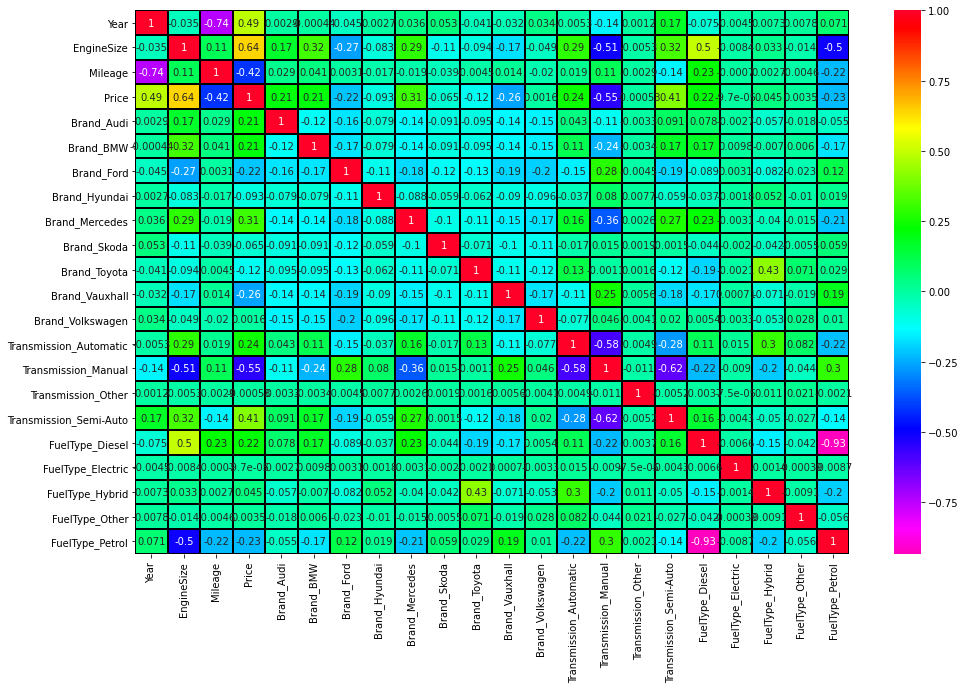

In [8]:
pllt.figure(figsize = (16, 10))
sns.heatmap(Cars_dum.corr(), annot = True, cmap="gist_rainbow_r", linewidths=1, linecolor='black')
pllt.show()

**Key Points:**
- The highest correlation with price is with Engine Size, followed by Year.
- There are no correlations above 90 so I don't have to drop any columns.

# Models

- First stap is to split the data for Train and Test.
- My aim is to predict the *Price* column with the other variables of *Year*, *Engine Size*, *Brand*, *Fuel Type*, *Transmission*, and *Mileage*.
- When I separate the test and train I take *Price* as the target.
- I will separate the data and take 80% to train and 20% to test.

In [9]:
X = Cars_dum.drop(columns=["Price"])
y = Cars_dum["Price"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


#### Check Models

In [10]:
def run_model(X_train, y_train, model, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    r2_train=r2_score(y_train, y_pred_train)
    r2_test=r2_score(y_test, y_pred_test)
    rmse_train=(mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test=(mean_squared_error(y_test, y_pred_test))**0.5
    
    return f"Train, r2_score: {r2_train}", f"Test, r2_score: {r2_test}", f"Train rmse: {rmse_train}", f"Test, rmse: {rmse_test}"


The purpose of the function above is to apply it to every model and receive the r2 score and the mean squared error for the Train and Test data.

### Linear Regression

In [11]:
lr = LinearRegression()
run_model(X_train, y_train, lr, X_test, y_test)


('Train, r2_score: 0.7605701258352826',
 'Test, r2_score: 0.7630850545674686',
 'Train rmse: 4838.786053102286',
 'Test, rmse: 4761.942645327993')

### Kneighbors Regression

In [12]:
KN = KNeighborsRegressor(n_neighbors=2)
run_model(X_train, y_train, KN, X_test, y_test)

('Train, r2_score: 0.8318270962062388',
 'Test, r2_score: 0.4652875824256827',
 'Train rmse: 4055.321247512233',
 'Test, rmse: 7153.985671504492')

### Random Forest Regression

In [13]:
rand_reg = RandomForestRegressor()
run_model(X_train, y_train, rand_reg, X_test, y_test)


('Train, r2_score: 0.972581737972048',
 'Test, r2_score: 0.8492977834178136',
 'Train rmse: 1637.4468527656727',
 'Test, rmse: 3797.936953973358')

### Decision Tree Regression

In [14]:
DT = DecisionTreeRegressor()
run_model(X_train, y_train, DT, X_test, y_test)

('Train, r2_score: 0.9902756074651474',
 'Test, r2_score: 0.7850042132326223',
 'Train rmse: 975.165868351495',
 'Test, rmse: 4536.311882192682')